In [1]:
# define some necessary packages
import os
import random
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib

In [71]:
# impoting the strength database
from openpyxl import load_workbook
dataset = pd.read_excel('database.xlsx', engine='openpyxl')

dataset.head()

,a,b,h,fyv,pv,s,fc,pst,fyt,p,λ,n,Vn
0,910.0,230.0,410.0,413.70,0.28,89.0,34.9,3.01,441.28,533.76,1.181818,0.162184,324.00
1,1200.0,350.0,350.0,500.00,0.13,125.0,29.2,2.05,320.00,1251.95,1.846154,0.350000,353.30
2,910.0,410.0,230.0,413.70,0.31,89.0,34.9,3.01,441.28,533.76,2.219512,0.162184,265.00
3,2950.0,460.0,460.0,468.86,0.17,305.0,21.1,2.53,441.30,667.20,3.406467,0.149437,314.92
4,910.0,310.0,310.0,414.00,0.09,210.0,29.9,2.44,462.00,288.00,1.596491,0.100230,214.00


In [3]:
dataset.describe()

,a,b,h,fyv,pv,s,fc,pst,fyt,p,λ,n,Vn
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,1165.211905,279.451190,308.975000,401.346429,1.613214,156.765476,27.193274,1.083214,411.893929,534.058733,2.499892,0.242201,200.784881
std,755.027582,125.966677,119.035946,77.690007,1.117835,125.501998,9.708410,1.033997,94.382194,537.154323,0.936525,0.185637,129.747930
min,80.000000,80.000000,80.000000,54.000000,0.070000,20.000000,4.340000,0.000000,46.000000,0.000000,1.063830,0.000000,23.000000
25%,800.000000,195.000000,200.000000,345.000000,0.280000,78.750000,21.100000,0.280000,345.000000,178.000000,1.666667,0.116589,87.000000
50%,905.000000,240.000000,300.000000,398.000000,2.000000,100.000000,26.300000,0.585000,400.000000,400.120000,2.285714,0.200000,187.500000
75%,1473.200000,350.000000,410.000000,454.250000,2.477500,170.000000,32.925000,2.000000,463.750000,592.980000,3.421802,0.280915,297.250000
max,2970.000000,914.400000,914.400000,587.000000,4.120000,457.200000,86.000000,3.530000,689.000000,2688.095479,4.041616,0.900343,605.000000


In [4]:
# checking the dimension of the database
print(dataset.shape)

(168, 13)


In [5]:
# define the inputs and the output
X = dataset.loc[:, dataset.columns != 'Vn']
y = dataset.loc[:, 'Vn']

print(X.shape)
print(y.shape)

(168, 12)
(168,)


In [6]:
# normalizing the whole data sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [7]:
# randomly spliting the database into training-testing sets as 80%-20% 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Building the ensemble learnning model -- Random forest

In [8]:
#  building the ensemble learnning model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

regr_1 = RandomForestRegressor(n_estimators=68
                             ,random_state=90
                             ,max_depth=8
                             ,max_leaf_nodes=64
                             ,min_samples_leaf=1, min_samples_split=2)
scores = cross_val_score (regr_1, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
print('10-fold mean RMSE:', np.mean(np.sqrt( -scores)))

10-fold mean RMSE: 34.6334740211897


In [9]:
# training the model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 

def MAPE(true, pred):
    diff = np.abs(np.array(true) - np.array(pred))
    return np.mean(diff / true)

regr_1.fit(X_train, y_train)

# predicting the results
Z1 = regr_1.predict(X_train)
Z2 = regr_1.predict(X_test)

print("Training R2:", r2_score(y_train, Z1), "RMSE:", np.sqrt(mean_squared_error(y_train, Z1)),
      "MAE:", mean_absolute_error(y_train, Z1), "MAPE:", MAPE(y_train, Z1))
print("Testing R2:", r2_score(y_test, Z2), "RMSE:", np.sqrt(mean_squared_error(y_test, Z2)),
      "MAE:", mean_absolute_error(y_test, Z2), "MAPE:", MAPE(y_test, Z2))

dirs = 'testModel'
if not os.path.exists(dirs):
    os.makedirs(dirs)
    
# 保存模型
joblib.dump(regr_1, "./model/RF.pkl")

Training R2: 0.9865635561523863 RMSE: 14.018655810887461 MAE: 8.452070629309599 MAPE: 0.05183888733233425
Testing R2: 0.8984608259025634 RMSE: 50.091428433605536 MAE: 27.4964026669217 MAPE: 0.1368503902902953


['./model/RF.pkl']

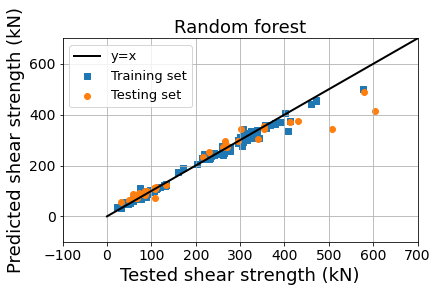

In [10]:
# plotting the scatter for the training and testing sets
import matplotlib.pyplot as plt

xx = np.linspace(0, 700, 100)
yy = xx

plt.figure()
plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(y_train, Z1, marker='s')
plt.scatter(y_test, Z2, marker='o')

plt.grid()
plt.legend(['y=x', 'Training set', 'Testing set'], loc = 'upper left', fontsize=13)
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Tested shear strength (kN)',fontsize=18)
plt.ylabel('Predicted shear strength (kN)',fontsize=18)
plt.tick_params(labelsize=14)
plt.xlim([-100, 700])
plt.ylim([-100, 700])
plt.title('Random forest',fontsize=18)
plt.savefig("./picture/RF.png",dpi=1000, bbox_inches = 'tight')
plt.tight_layout()

# Building the ensemble learnning model -- AdaBoost

In [11]:
# building the ensemble learnning model
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

regr_2 = AdaBoostRegressor(n_estimators=132,
                        random_state=90,
                        learning_rate=0.27)
scores = cross_val_score (regr_2, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
print('10-fold mean RMSE:', np.mean(np.sqrt( -scores)))

10-fold mean RMSE: 34.30184288047231


In [12]:
# training the model
regr_2.fit(X_train, y_train)

# predicting the results
Z1 = regr_2.predict(X_train)
Z2 = regr_2.predict(X_test)

print("Training R2:", r2_score(y_train, Z1), "RMSE:", np.sqrt(mean_squared_error(y_train, Z1)),
      "MAE:", mean_absolute_error(y_train, Z1), "MAPE:", MAPE(y_train, Z1))
print("Testing R2:", r2_score(y_test, Z2), "RMSE:", np.sqrt(mean_squared_error(y_test, Z2)),
      "MAE:", mean_absolute_error(y_test, Z2), "MAPE:", MAPE(y_test, Z2))
joblib.dump(regr_2, "./model/AdaBoost.pkl")

Training R2: 0.9562685029366547 RMSE: 25.290730553179316 MAE: 20.08159133903319 MAPE: 0.15880869027094557
Testing R2: 0.8619029163920693 RMSE: 58.416947085249966 MAE: 33.91225200586822 MAPE: 0.20364415948811826


['./model/AdaBoost.pkl']

In [13]:
Z = regr_2.predict(X)
print("Training R2:", r2_score(y, Z), "RMSE:", np.sqrt(mean_squared_error(y, Z)),
      "MAE:", mean_absolute_error(y, Z), "MAPE:", MAPE(y, Z))

Training R2: 0.9282428575732606 RMSE: 34.65266180477972 MAE: 22.880653616845045 MAPE: 0.16788253523156385


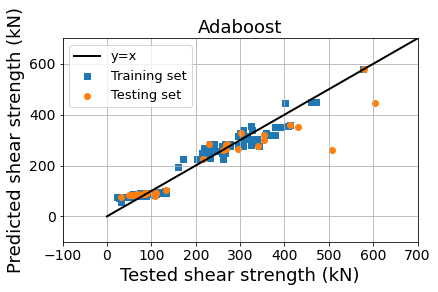

In [14]:
# plotting the scatter for the training and testing sets
import matplotlib.pyplot as plt

xx = np.linspace(0, 700, 100)
yy = xx

plt.figure()
plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(y_train, Z1, marker='s')
plt.scatter(y_test, Z2, marker='o')

plt.grid()
plt.legend(['y=x', 'Training set', 'Testing set'], loc = 'upper left', fontsize=13)
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Tested shear strength (kN)', fontsize=18)
plt.ylabel('Predicted shear strength (kN)', fontsize=18)
plt.tick_params(labelsize=14)
plt.xlim([-100, 700])
plt.ylim([-100, 700])
plt.title('Adaboost', fontsize=18)
plt.savefig("./picture/adaboost.png",dpi=1000, bbox_inches = 'tight')
plt.tight_layout()

# Building the ensemble learnning model -- GBRT

In [15]:
# building the ensemble learnning model
from sklearn.ensemble import GradientBoostingRegressor

regr_3 = GradientBoostingRegressor(n_estimators=121
                                 ,max_depth=2
                                 ,learning_rate=0.54
                             ,random_state=90
                                 ,max_leaf_nodes=4
                                 ,min_samples_leaf=1
                                 ,min_samples_split=4
                             )
scores = cross_val_score (regr_3, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
print('10-fold mean RMSE:', np.mean(np.sqrt( -scores)))

10-fold mean RMSE: 26.967184955529603


In [16]:
# training the model
regr_3.fit(X_train, y_train)

# predicting the results
Z1 = regr_3.predict(X_train)
Z2 = regr_3.predict(X_test)

print("Training R2:", r2_score(y_train, Z1), "RMSE:", np.sqrt(mean_squared_error(y_train, Z1)),
      "MAE:", mean_absolute_error(y_train, Z1), "MAPE:", MAPE(y_train, Z1))
print("Testing R2:", r2_score(y_test, Z2), "RMSE:", np.sqrt(mean_squared_error(y_test, Z2)),
      "MAE:", mean_absolute_error(y_test, Z2), "MAPE:", MAPE(y_test, Z2))
joblib.dump(regr_3, "./model/GBRT.pkl")

Training R2: 0.9992031633348639 RMSE: 3.413884759800784 MAE: 1.787211663029487 MAPE: 0.011431997925881964
Testing R2: 0.9116680351013231 RMSE: 46.72029203203231 MAE: 22.44548858666801 MAPE: 0.11446114314452703


['./model/GBRT.pkl']

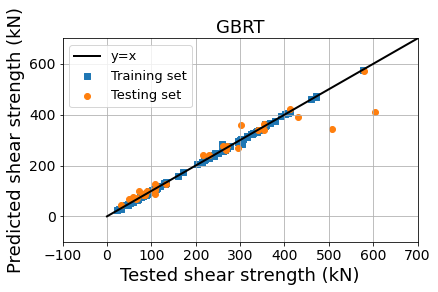

In [17]:
# plotting the scatter for the training and testing sets
import matplotlib.pyplot as plt

xx = np.linspace(0, 700, 100)
yy = xx

plt.figure()
plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(y_train, Z1, marker='s')
plt.scatter(y_test, Z2, marker='o')

plt.grid()
plt.legend(['y=x', 'Training set', 'Testing set'], loc = 'upper left', fontsize=13)
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Tested shear strength (kN)', fontsize=18)
plt.ylabel('Predicted shear strength (kN)', fontsize=18)
plt.tick_params(labelsize=14)
plt.xlim([-100, 700])
plt.ylim([-100, 700])
plt.title('GBRT', fontsize=18)
plt.savefig("./picture/GBRT.png",dpi=1000, bbox_inches = 'tight')
plt.tight_layout()

# Building the ensemble learnning model -- XGBoost

In [18]:
# building the ensemble learnning model
import xgboost as xgb

regr_4 = xgb.XGBRegressor(n_estimators=122
                                 ,max_depth=6
                             ,random_state=90
                        ,learning_rate=0.07
                        ,colsample_bytree=0.7
                             ,subsample=0.8)

scores = cross_val_score (regr_4, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)
print('10-fold mean RMSE:', np.mean(np.sqrt( -scores)))

10-fold mean RMSE: 23.465070720045553


In [19]:
# training the model
regr_4.fit(X_train, y_train)

# predicting the results
Z1 = regr_4.predict(X_train)
Z2 = regr_4.predict(X_test)

print("Training R2:", r2_score(y_train, Z1), "RMSE:", np.sqrt(mean_squared_error(y_train, Z1)),
      "MAE:", mean_absolute_error(y_train, Z1), "MAPE:", MAPE(y_train, Z1))
print("Testing R2:", r2_score(y_test, Z2), "RMSE:", np.sqrt(mean_squared_error(y_test, Z2)),
      "MAE:", mean_absolute_error(y_test, Z2), "MAPE:", MAPE(y_test, Z2))
joblib.dump(regr_4, "./model/XGBoost.pkl")

Training R2: 0.9989627101991218 RMSE: 3.8950609336862185 MAE: 2.2942331632927297 MAPE: 0.013651979301726336
Testing R2: 0.8908585287540773 RMSE: 51.93277207652692 MAE: 24.649736965403836 MAPE: 0.11545180876143844


['./model/XGBoost.pkl']

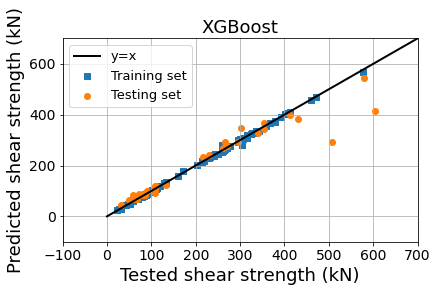

In [20]:
# plotting the scatter for the training and testing sets
import matplotlib.pyplot as plt

xx = np.linspace(0, 700, 100)
yy = xx

plt.figure()
plt.plot(xx, yy, c='k', linewidth=2)
plt.scatter(y_train, Z1, marker='s')
plt.scatter(y_test, Z2, marker='o')

plt.grid()
plt.legend(['y=x', 'Training set', 'Testing set'], loc = 'upper left',fontsize=13)
plt.tick_params (axis = 'both', which = 'major')
plt.axis('tight')
plt.xlabel('Tested shear strength (kN)',fontsize=18)
plt.ylabel('Predicted shear strength (kN)',fontsize=18)
plt.tick_params(labelsize=14)
plt.xlim([-100, 700])
plt.ylim([-100, 700])
plt.title('XGBoost',fontsize=18)
plt.savefig("./picture/XGBOOST.png",dpi=1000, bbox_inches = 'tight')
plt.tight_layout()

# comprasion picture

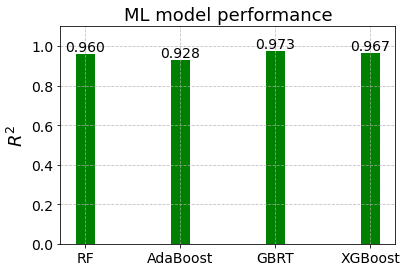

In [21]:
A1 = regr_1.predict(X)
A2 = regr_2.predict(X)
A3 = regr_3.predict(X)
A4 = regr_4.predict(X)
model_name = ['RF','AdaBoost','GBRT','XGBoost']
y = dataset.loc[:, 'Vn']
y1 = r2_score(y, A1)
y2 = r2_score(y, A2)
y3 = r2_score(y, A3)
y4 = r2_score(y, A4)
# 横坐标
x = range(len(model_name))
Y = [y1, y2, y3, y4]
# 1.创建画布
plt.figure()

# 2.绘制柱状图
plt.bar(x, Y, width=0.2, color='g')

# 2.1b修改x轴的刻度显示
plt.xticks(x, model_name)
plt.ylabel('$R^2$', fontsize=18)
plt.ylim([0, 1.1])
# 2.2 添加网格显示
plt.grid(linestyle="--", alpha=0.8)
plt.tick_params(labelsize=14)
# 2.3 添加标题
plt.title("ML model performance", fontsize=18)

for a,b in zip(x,Y):   #柱子上的数字显示
 plt.text(a,b,'%.3f'%b,ha='center',va='bottom', fontsize=14);
plt.savefig("./picture/r2 comparison.png",dpi=1000, bbox_inches = 'tight')
# 3.显示图像
plt.show()

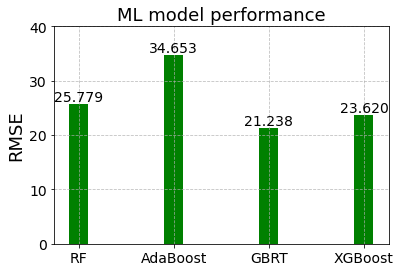

In [22]:
A1 = regr_1.predict(X)
A2 = regr_2.predict(X)
A3 = regr_3.predict(X)
A4 = regr_4.predict(X)
model_name = ['RF','AdaBoost','GBRT','XGBoost']
y = dataset.loc[:, 'Vn']
y1 = np.sqrt(mean_squared_error(y, A1))
y2 = np.sqrt(mean_squared_error(y, A2))
y3 = np.sqrt(mean_squared_error(y, A3))
y4 = np.sqrt(mean_squared_error(y, A4))
# 横坐标
x = range(len(model_name))
Y = [y1, y2, y3, y4]
# 1.创建画布
plt.figure()

# 2.绘制柱状图
plt.bar(x, Y, width=0.2, color='g')

# 2.1b修改x轴的刻度显示
plt.xticks(x, model_name)
plt.ylabel('RMSE', fontsize=18)
plt.ylim([0, 40])
# 2.2 添加网格显示
plt.grid(linestyle="--", alpha=0.8)
plt.tick_params(labelsize=14)
# 2.3 添加标题
plt.title("ML model performance", fontsize=18)

for a,b in zip(x,Y):   #柱子上的数字显示
 plt.text(a,b,'%.3f'%b,ha='center',va='bottom', fontsize=14);
plt.savefig("./picture/RMSE comparison.png",dpi=1000, bbox_inches = 'tight')
# 3.显示图像
plt.show()

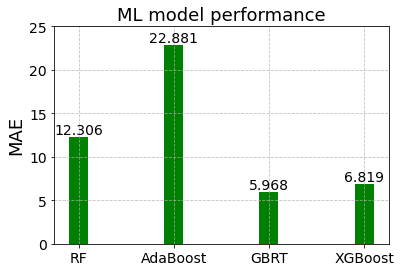

In [23]:
A1 = regr_1.predict(X)
A2 = regr_2.predict(X)
A3 = regr_3.predict(X)
A4 = regr_4.predict(X)
model_name = ['RF','AdaBoost','GBRT','XGBoost']
y = dataset.loc[:, 'Vn']
y1 = mean_absolute_error(y, A1)
y2 = mean_absolute_error(y, A2)
y3 = mean_absolute_error(y, A3)
y4 = mean_absolute_error(y, A4)
# 横坐标
x = range(len(model_name))
Y = [y1, y2, y3, y4]
# 1.创建画布
plt.figure()

# 2.绘制柱状图
plt.bar(x, Y, width=0.2, color='g')

# 2.1b修改x轴的刻度显示
plt.xticks(x, model_name)
plt.ylabel('MAE', fontsize=18)
plt.ylim([0, 25])
plt.tick_params(labelsize=14)
# 2.2 添加网格显示
plt.grid(linestyle="--", alpha=0.8)

# 2.3 添加标题
plt.title("ML model performance", fontsize=18)

for a,b in zip(x,Y):   #柱子上的数字显示
 plt.text(a,b,'%.3f'%b,ha='center',va='bottom', fontsize=14);
plt.savefig("./picture/MAE comparison.png",dpi=1000, bbox_inches = 'tight')
# 3.显示图像
plt.show()

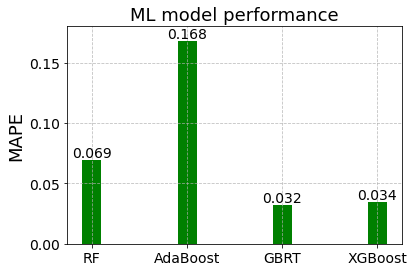

In [24]:
A1 = regr_1.predict(X)
A2 = regr_2.predict(X)
A3 = regr_3.predict(X)
A4 = regr_4.predict(X)
model_name = ['RF','AdaBoost','GBRT','XGBoost']
y = dataset.loc[:, 'Vn']
y1 = MAPE(y, A1)
y2 = MAPE(y, A2)
y3 = MAPE(y, A3)
y4 = MAPE(y, A4)
# 横坐标
x = range(len(model_name))
Y = [y1, y2, y3, y4]
# 1.创建画布
plt.figure()

# 2.绘制柱状图
plt.bar(x, Y, width=0.2, color='g')

# 2.1b修改x轴的刻度显示
plt.xticks(x, model_name)
plt.ylabel('MAPE', fontsize=18)
plt.tick_params(labelsize=14)
plt.ylim([0, 0.18])
# 2.2 添加网格显示
plt.grid(linestyle="--", alpha=0.8)

# 2.3 添加标题
plt.title("ML model performance", fontsize=18)

for a,b in zip(x,Y):   #柱子上的数字显示
 plt.text(a,b,'%.3f'%b,ha='center',va='bottom', fontsize=14);
plt.savefig("./picture/MAPE comparison.png",dpi=1000, bbox_inches = 'tight')
# 3.显示图像
plt.show()

# comparison with code

In [27]:
em = pd.read_excel('column with code.xlsx', engine='openpyxl')
em.head()

,L,b,h,fyv,pv,s,fc,pst,fyt,p,λ,n,Vn,VACI(KN),VGB(KN),VBS,Vn/VACI,Vn/VGB,Vn/VBS
0,910.0,230.0,410.0,413.70,0.28,89.0,34.9,3.01,441.28,533.76,1.181818,0.162184,324.00,191.250896,233.455968,286.144923,1.694110,1.387842,1.132293
1,1200.0,350.0,350.0,500.00,0.13,125.0,29.2,2.05,320.00,1251.95,1.846154,0.350000,353.30,218.371896,263.851859,377.714802,1.617882,1.339009,0.935362
2,910.0,410.0,230.0,413.70,0.31,89.0,34.9,3.01,441.28,533.76,2.219512,0.162184,265.00,165.918578,227.972736,264.755742,1.597169,1.162420,1.000923
3,2950.0,460.0,460.0,468.86,0.17,305.0,21.1,2.53,441.30,667.20,3.406467,0.149437,314.92,238.621800,358.613842,371.169247,1.319745,0.878159,0.848454
4,910.0,310.0,310.0,414.00,0.09,210.0,29.9,2.44,462.00,288.00,1.596491,0.100230,214.00,124.723812,206.711363,191.088993,1.715791,1.035260,1.119897


 mean : 1.183286253919943  std : 0.4588600575249186  COV : 0.38778449086586236


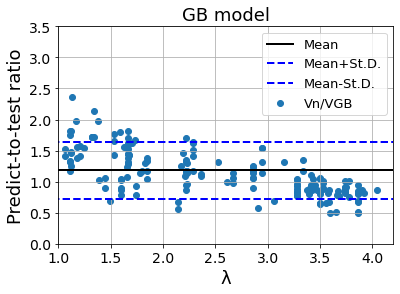

In [64]:
# Results by GB
ratio_GB=em['Vn/VGB']
mean = np.mean(ratio_GB)
std = np.std(ratio_GB, ddof=1)

print(' mean :', mean, ' std :', std, ' COV :', std/mean)

D = em.loc[:, 'λ']          
V = em.loc[:, 'Vn/VGB']          

xx = np.linspace(0, 200, 3)
yy = mean*np.ones(3)
yy1 = (mean+std)*np.ones(3)
yy2 = (mean-std)*np.ones(3)

plt.figure()
plt.scatter(D, V, marker='o')

plt.plot(xx, yy, c='k', linewidth=2)
plt.plot(xx, yy1, c='b', ls='--', linewidth=2)
plt.plot(xx, yy2, c='b', ls='--', linewidth=2)

plt.xlabel('λ', fontsize=18)
plt.ylabel('Predict-to-test ratio', fontsize=18)
plt.xlim([1, 4.2])
plt.ylim([0, 3.5])
plt.legend(['Mean','Mean+St.D.','Mean-St.D.','Vn/VGB'], fontsize=13)
plt.title('GB model', fontsize=18)
plt.tick_params(labelsize=14)
plt.grid()
plt.savefig("./picture/GB comparison.png",dpi=1000, bbox_inches = 'tight')
plt.show()


 mean : 1.7071173355106917  std : 0.6992013751969612  COV : 0.4095801504984378


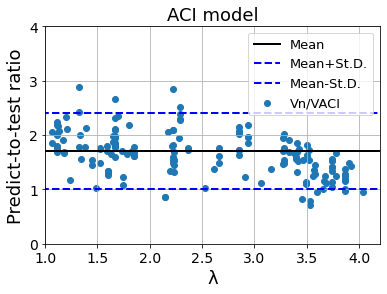

In [70]:
# Results by ACI
ratio_GB=em['Vn/VACI']
mean = np.mean(ratio_GB)
std = np.std(ratio_GB, ddof=1)

print(' mean :', mean, ' std :', std, ' COV :', std/mean)

D = em.loc[:, 'λ']          
V = em.loc[:, 'Vn/VACI']          

xx = np.linspace(0, 200, 3)
yy = mean*np.ones(3)
yy1 = (mean+std)*np.ones(3)
yy2 = (mean-std)*np.ones(3)

plt.figure()
plt.scatter(D, V, marker='o')

plt.plot(xx, yy, c='k', linewidth=2)
plt.plot(xx, yy1, c='b', ls='--', linewidth=2)
plt.plot(xx, yy2, c='b', ls='--', linewidth=2)

plt.xlabel('λ', fontsize=18)
plt.ylabel('Predict-to-test ratio', fontsize=18)
plt.xlim([1, 4.2])
plt.ylim([0, 4])
plt.legend(['Mean','Mean+St.D.','Mean-St.D.','Vn/VACI'], fontsize=13,ncol=1)
plt.title('ACI model', fontsize=18)
plt.tick_params(labelsize=14)
plt.grid()
plt.savefig("./picture/ACI comparison.png",dpi=1000, bbox_inches = 'tight')
plt.show()


 mean : 0.836167605717222  std : 0.39407498823516646  COV : 0.47128707873961345


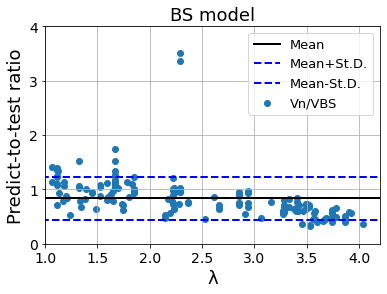

In [68]:
# Results by BS
ratio_GB=em['Vn/VBS']
mean = np.mean(ratio_GB)
std = np.std(ratio_GB, ddof=1)

print(' mean :', mean, ' std :', std, ' COV :', std/mean)

D = em.loc[:, 'λ']          
V = em.loc[:, 'Vn/VBS']          

xx = np.linspace(0, 200, 3)
yy = mean*np.ones(3)
yy1 = (mean+std)*np.ones(3)
yy2 = (mean-std)*np.ones(3)

plt.figure()
plt.scatter(D, V, marker='o')

plt.plot(xx, yy, c='k', linewidth=2)
plt.plot(xx, yy1, c='b', ls='--', linewidth=2)
plt.plot(xx, yy2, c='b', ls='--', linewidth=2)

plt.xlabel('λ', fontsize=18)
plt.ylabel('Predict-to-test ratio', fontsize=18)
plt.xlim([1, 4.2])
plt.ylim([0, 4])
plt.legend(['Mean','Mean+St.D.','Mean-St.D.','Vn/VBS'], fontsize=13)
plt.title('BS model', fontsize=18)
plt.tick_params(labelsize=14)
plt.grid()
plt.savefig("./picture/VBS comparison.png",dpi=1000, bbox_inches = 'tight')
plt.show()


 mean : 0.9960449205251107  std : 0.0754640612165538  COV : 0.07576371272168073


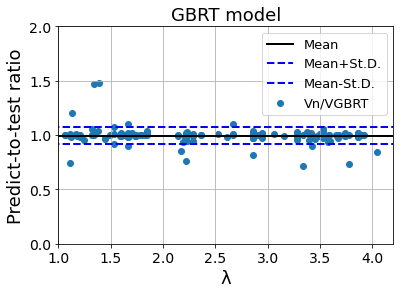

In [69]:
# Results by ML
X_new = em.iloc[:, :12]
X_new = scaler.transform(X_new)
y_new = em['Vn']

GBRT_res = y_new / regr_3.predict(X_new)
em['GBRT'] = GBRT_res

ratio_GBRT = GBRT_res
mean = np.mean(ratio_GBRT)
std = np.std(ratio_GBRT, ddof=1)
print(' mean :', mean, ' std :', std, ' COV :', std/mean)

D = em.loc[:, 'λ']              

xx = np.linspace(0, 200, 3)
yy = mean*np.ones(3)
yy1 = (mean+std)*np.ones(3)
yy2 = (mean-std)*np.ones(3)

plt.figure()
plt.scatter(D, GBRT_res, marker='o')

plt.plot(xx, yy, c='k', linewidth=2)
plt.plot(xx, yy1, c='b', ls='--', linewidth=2)
plt.plot(xx, yy2, c='b', ls='--', linewidth=2)

plt.xlabel('λ', fontsize=18)
plt.ylabel('Predict-to-test ratio', fontsize=18)
plt.xlim([1, 4.2])
plt.ylim([0, 2])
plt.legend(['Mean','Mean+St.D.','Mean-St.D.','Vn/VGBRT'], fontsize=13)
plt.title('GBRT model', fontsize=18)
plt.tick_params(labelsize=14)
plt.grid()
plt.savefig("./picture/GBRT comparison.png",dpi=1000, bbox_inches = 'tight')
plt.show()
